In [1]:
import pyforest

In [93]:
rf_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/RF_results/'
neks = ['NEK2_binding','NEK2_inhibition','NEK3_binding','NEK5_binding','NEK9_binding','NEK9_inhibition']
samplings =['none_scaled','UNDER','SMOTE','ADASYN'] 
feats=['MOE','MFP'] 
RF_types = ['RF','RF_BCW','BRFC','BRFC_BCW']

# RF kfold Results
rf = pd.read_csv(f'{rf_path}RF_prod_test_results_all_NEK.csv')
rf['1-specificity']=1-rf['specificity']
rf['nek type'] = rf['NEK'].astype(str).str.split('_').str[1]
rf=rf.replace('none_scaled', 'no_sampling')
rf['model version'] = rf['RF_type'] 


rf_raw = rf[(rf['strategy'] == 'no_sampling') & (rf['RF_type'].isin(['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']))]
rf_other = rf[(rf['RF_type'] == 'RF') & (rf['strategy'].isin(['UNDER', 'SMOTE']))]  
rf_filtered = pd.concat([rf_raw, rf_other])
total_rf = rf_filtered.copy() 
total_rf['strategy'] =total_rf['strategy'].astype(str) +'_'+ total_rf['RF_type']

binding = total_rf[total_rf['nek type'] == 'binding'] 
inhib = total_rf[total_rf['nek type'] == 'inhibition'] 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
total_rf['strategy'].unique()

array(['no_sampling_RF', 'no_sampling_RF_BCW', 'no_sampling_BRFC',
       'no_sampling_BRFC_BCW', 'UNDER_RF', 'SMOTE_RF'], dtype=object)

In [54]:
samp_palette={'no_sampling': 'tab:blue', 'UNDER':'tab:orange', 'SMOTE': 'hotpink', 'ADASYN':'tab:red', 
             'no_sampling_RF': 'cornflowerblue', 'no_sampling_RF_BCW': 'lavender', 'UNDER_RF': 'orange', 
             'no_sampling_BRFC': 'blue', 'SMOTE_RF': 'hotpink', 'ADASYN_RF': 'red', 
             'no_sampling_BRFC_BCW': 'black'}

In [95]:
rf_plots='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/plots/RF/prod/'

In [6]:
# for nek in total_rf['NEK'].unique():
#     fig, axs = plt.subplots(1,2, figsize=(12,6))
#     nek_df = total_rf[total_rf['NEK']==nek]
    
#     moe_df = nek_df[(nek_df['NEK'] == nek) & (nek_df['feat_type'] == 'MOE')]
#     mfp_df = nek_df[(nek_df['NEK'] == nek) & (nek_df['feat_type'] == 'MFP')]
#     sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', 
#                    s=300, alpha=0.6, ax=axs[0], legend=True, palette=samp_palette )
#     sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',
#                   s=300, alpha=0.6, ax=axs[1], legend=False, palette=samp_palette )
#     plt.suptitle(f'{nek} RF Models', fontsize=18, x=0.51, y =.96)
#     for i, ax in enumerate(axs): 
#         axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
#         axs[i].set_xlim(-0.1, 1.1)
#         axs[i].set_ylim(-0.1, 1.1)
#         axs[i].set_xlabel('1 - Specificity', fontsize=16)
#         axs[i].set_ylabel('Sensitivity (Recall)', fontsize=16)
    
        
#     axs[0].set_title(f'{nek} moe', fontsize=16)
#     axs[1].set_title(f'{nek} mfp', fontsize=16)
#     handles, labels = axs[0].get_legend_handles_labels()
#     fig.legend(handles=handles, labels=labels,
#                loc='upper center', bbox_to_anchor=(0.5, .01), ncol=2, fontsize=12)
#     axs[0].get_legend().remove()
    
#     plt.tight_layout(rect=[0, 0, 1, 0.95]) 
#     plt.savefig(f'{rf_plots}{nek}_RF_kfold_prod.png',bbox_inches='tight')
#     plt.tight_layout()
#     plt.show();

In [96]:
gp_path='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'
gp=pd.read_csv(f'{gp_path}GP_test_results_all_NEK.csv')
gp['1-specificity']=1-gp['specificity']
gp['nek type'] = gp['NEK'].astype(str).str.split('_').str[1]
gp=gp[gp['strategy']!='ADASYN']
gp=gp.replace('none_scaled', 'no_sampling')
# gp['strategy'] =gp['strategy'].astype(str) +'_'+ gp['kernel_type']
gp['modeling_type'] = gp['kernel_type']

gp=gp.drop(columns=['kernel_type'])
gp['model version'] = gp['modeling_type'] 
binding_gp = gp[gp['nek type'] == 'binding'] 
inhib_gp = gp[gp['nek type'] == 'inhibition'] 
gp_strategies=['no_sampling_GP_RBF', 'no_sampling_GP_matern', 'UNDER_GP_RBF',
       'UNDER_GP_matern', 'SMOTE_GP_RBF', 'SMOTE_GP_matern',
       'ADASYN_GP_RBF', 'ADASYN_GP_matern']
gen_colors = ['cornflowerblue', 'orange', 'hotpink','red'] 

for kern in ['RBF','matern']: 
    for samp, color in zip(['no_sampling','UNDER','SMOTE','ADASYN'], gen_colors): 
        gp_type = f'{samp}_GP_{kern}'
        samp_palette[gp_type]=color
    
    

<IPython.core.display.Javascript object>

In [97]:
gp['strategy'].unique()

array(['no_sampling', 'UNDER', 'SMOTE'], dtype=object)

In [98]:
total_rf['nek type'].value_counts()

nek type
binding       48
inhibition    24
Name: count, dtype: int64

In [99]:
gp['nek type'].value_counts()

nek type
binding       48
inhibition    24
Name: count, dtype: int64

In [100]:
model_types_dict = {'RF':'s', 'GP_RBF': 'o', 'GP_matern':'X' }
samp_palette

{'no_sampling': 'tab:blue',
 'UNDER': 'tab:orange',
 'SMOTE': 'hotpink',
 'ADASYN': 'tab:red',
 'no_sampling_RF': 'cornflowerblue',
 'no_sampling_RF_BCW': 'lavender',
 'UNDER_RF': 'orange',
 'no_sampling_BRFC': 'blue',
 'SMOTE_RF': 'hotpink',
 'ADASYN_RF': 'red',
 'no_sampling_BRFC_BCW': 'black',
 'no_sampling_GP_RBF': 'cornflowerblue',
 'UNDER_GP_RBF': 'orange',
 'SMOTE_GP_RBF': 'hotpink',
 'ADASYN_GP_RBF': 'red',
 'no_sampling_GP_matern': 'cornflowerblue',
 'UNDER_GP_matern': 'orange',
 'SMOTE_GP_matern': 'hotpink',
 'ADASYN_GP_matern': 'red'}

<IPython.core.display.Javascript object>

(108, 19)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

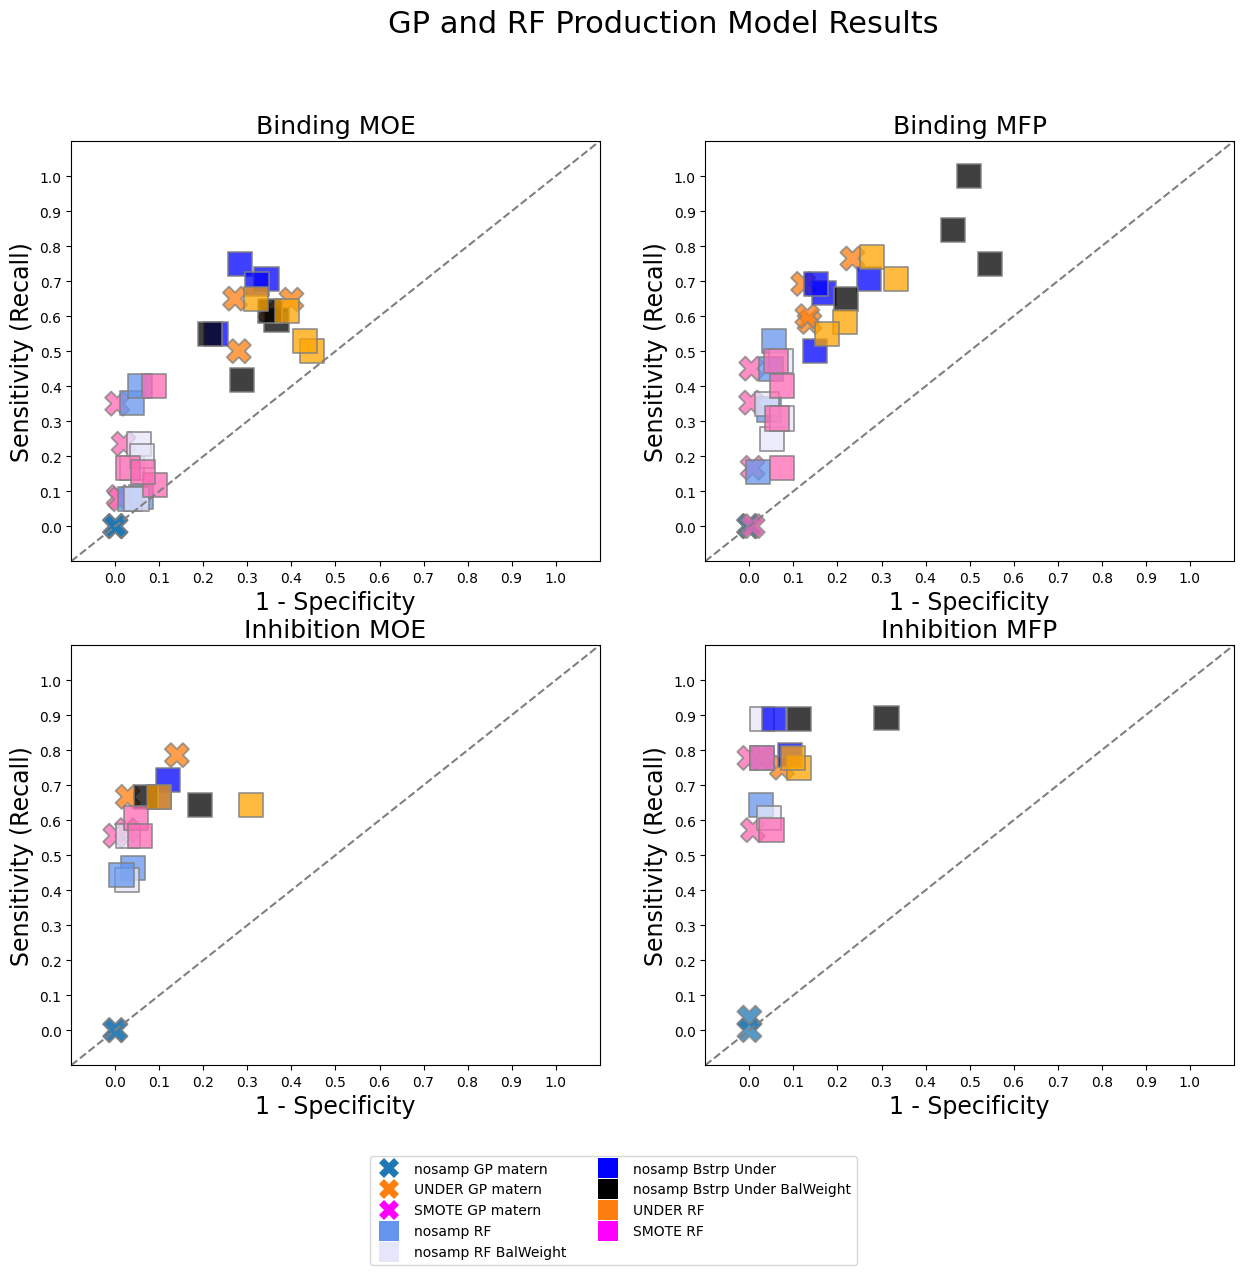

In [111]:
gp=gp[gp['modeling_type']!='GP_RBF']
full_df = pd.concat([gp, total_rf ])
print(full_df.shape)

full_df['nek type']=full_df['nek type'].replace('binding', 'Binding')
full_df['nek type']=full_df['nek type'].replace('inhibition', 'Inhibition')
all_bind = full_df[full_df['nek type'] == 'Binding'] 
all_inhib = full_df[full_df['nek type'] == 'Inhibition'] 

fig, axs = plt.subplots(2,2, figsize=(15,12))
from matplotlib.lines import Line2D
for i, this_df in enumerate(list([all_bind, all_inhib])): 
    moe_df =this_df[this_df['feat_type'] == 'MOE']
    mfp_df = this_df[this_df['feat_type'] == 'MFP']
    plt.suptitle('GP and RF Production Model Results',fontsize=22, x=0.52, y=0.99)
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,edgecolor='gray', ax=axs[i,0])
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,legend=True, ax=axs[i,1],edgecolor='gray')
    for j in range(2):  
        axs[i, j].plot([-0.1, 1.1], [-0.1, 1.1], linestyle='--', color='gray')
        axs[i, j].set_xlabel('1 - Specificity', fontsize=17)
        axs[i, j].set_ylabel('Sensitivity (Recall)', fontsize=17)
        axs[i, j].set_xlim(-0.1, 1.1)
        axs[i, j].set_ylim(-0.1, 1.1)
        axs[i, j].set_xticks(np.arange(0, 1.1, 0.1))
        axs[i, j].set_yticks(np.arange(0, 1.1, 0.1))
        axs[i, j].legend_.remove()
    
    axs[i, 0].set_title(f'{moe_df["nek type"].iloc[0]} MOE', fontsize=18)
    axs[i, 1].set_title(f'{mfp_df["nek type"].iloc[0]} MFP', fontsize=18)
   
    raw_RF_BCW = Line2D([0], [0], color='lavender', marker='s', markersize=15, linestyle='None', markerfacecolor='lavender', markeredgewidth=0, label='nosamp RF BalWeight')
    raw_BRFC = Line2D([0], [0], color='blue', marker='s', markersize=15, linestyle='None', markerfacecolor='blue', markeredgewidth=0, label='nosamp Bstrp Under')
    raw_BRFC_BCW = Line2D([0], [0], color='black', marker='s', markersize=15, linestyle='None', markerfacecolor='black', markeredgewidth=0, label='nosamp Bstrp Under BalWeight')
    UNDER_RF = Line2D([0], [0], color='tab:orange', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER RF')
    ADASYN_RF = Line2D([0], [0], color='tab:red', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN RF')
    raw_RF =  Line2D([0], [0], color='cornflowerblue', marker='s', markersize=15, linestyle='None', markerfacecolor='cornflowerblue', markeredgewidth=0, label='nosamp RF')
    UNDER_GP_matern = Line2D([0],[0], color='tab:orange', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP matern')
    UNDER_GP_RBF = Line2D([0],[0], color='tab:orange', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP RBF')
    ADASYN_GP_matern = Line2D([0], [0], color='tab:red', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP matern')
    ADASYN_GP_RBF = Line2D([0], [0], color='tab:red', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP RBF')
    SMOTE_RF = Line2D([0], [0], color='magenta', marker='s', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE RF')
    SMOTE_GP_matern = Line2D([0], [0], color='magenta', marker='X', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE GP matern')
    SMOTE_GP_RBF = Line2D([0], [0], color='magenta', marker='o', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE GP RBF')
    no_samp_GP_matern = Line2D([0], [0], color='tab:blue', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='nosamp GP matern')
    no_samp_GP_RBF = Line2D([0], [0], color='tab:blue', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='nosamp GP RBF')
   
    axs[1,1].legend(handles=[no_samp_GP_matern,UNDER_GP_matern,SMOTE_GP_matern,
                             raw_RF,raw_RF_BCW,raw_BRFC, raw_BRFC_BCW, UNDER_RF,SMOTE_RF], ncols=2, bbox_to_anchor=(.3, -.2) )

    plt.savefig(f'RF_GP_prod_results.png',bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

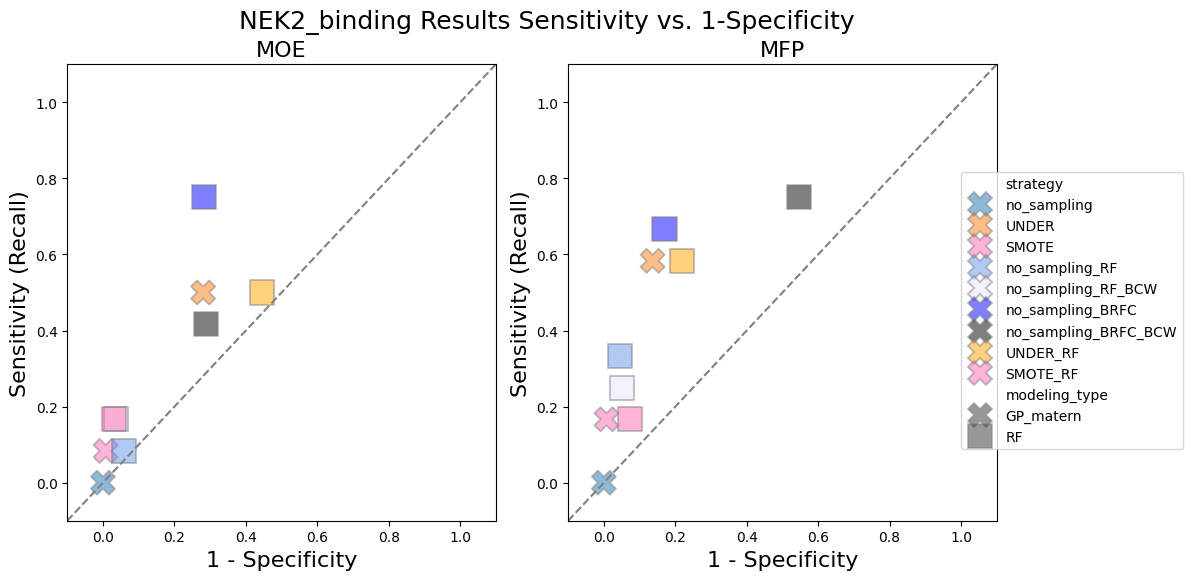

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

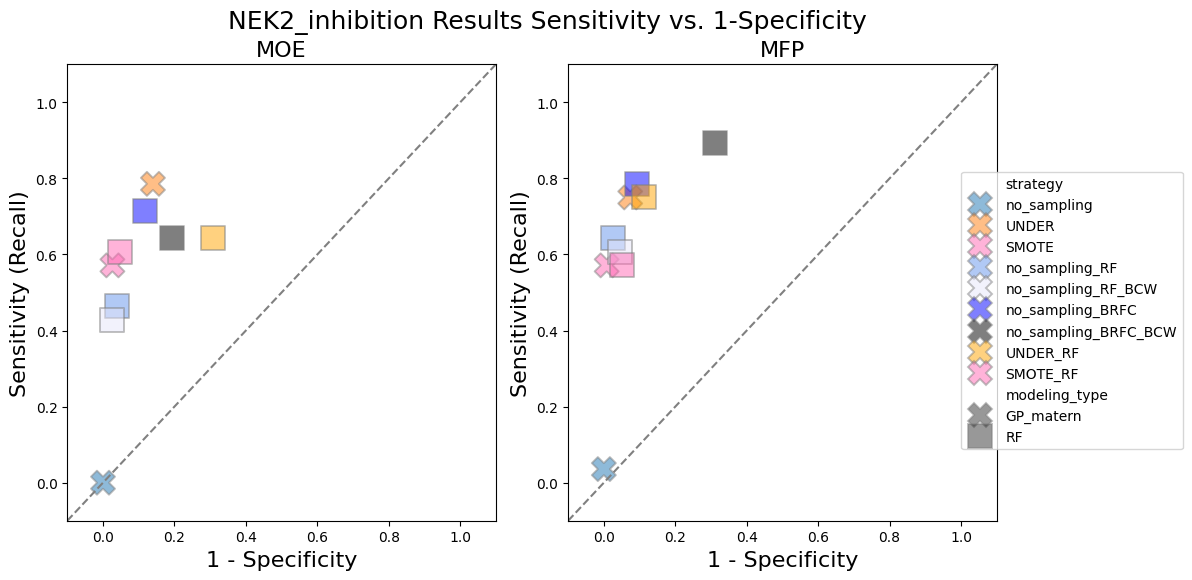

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

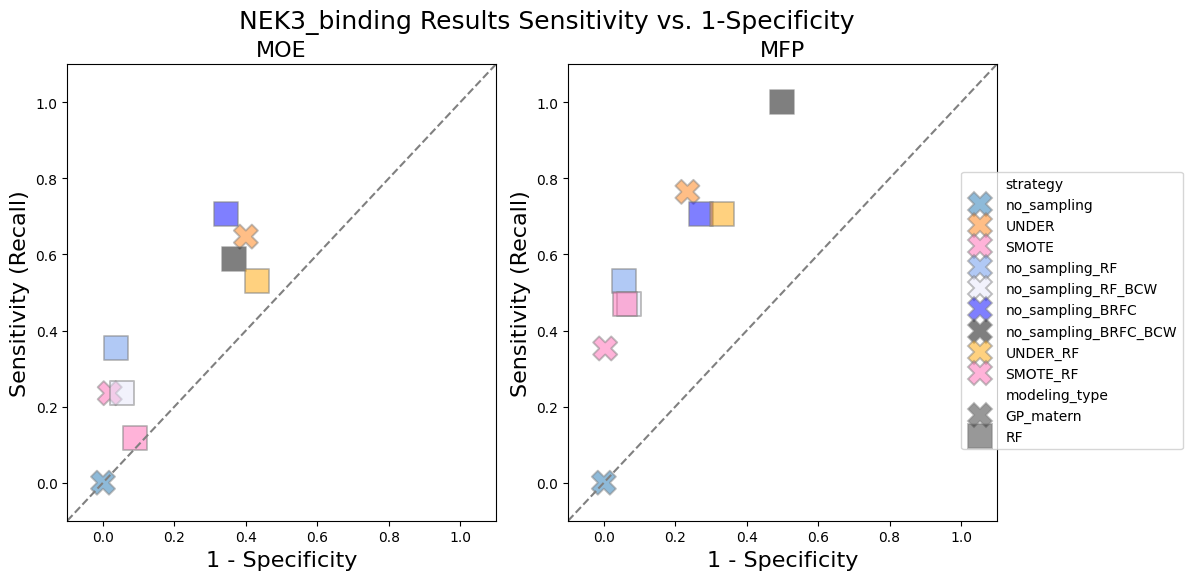

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

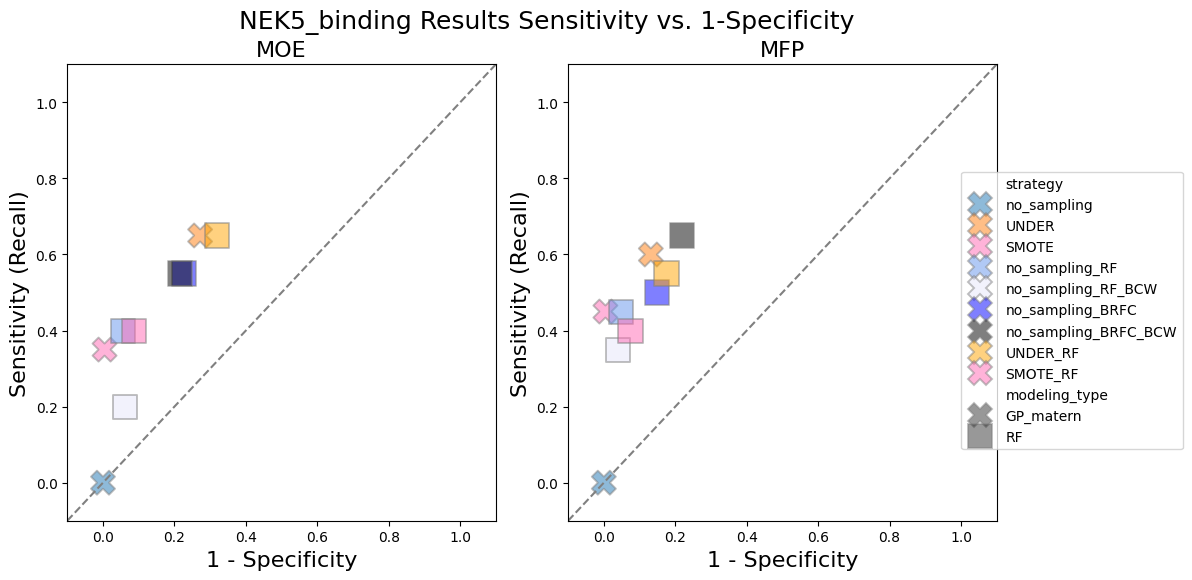

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

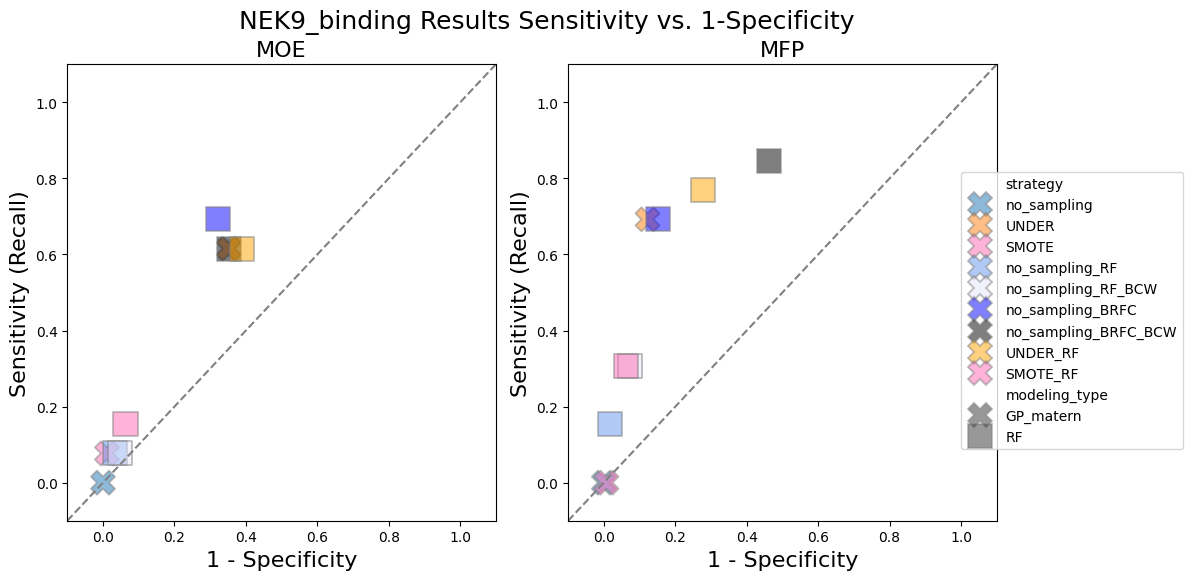

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

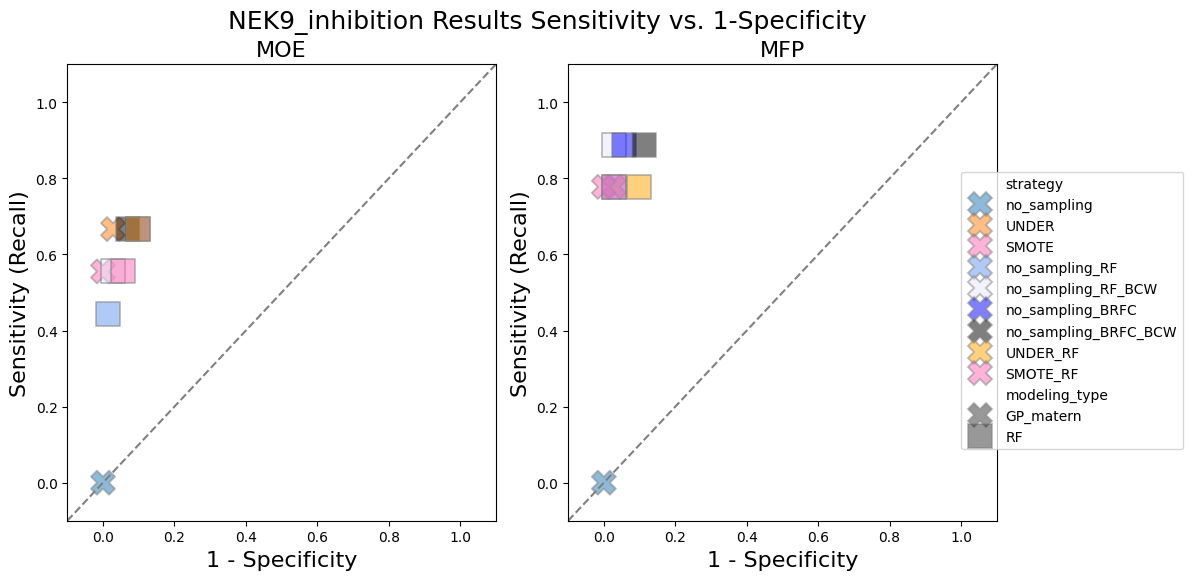

In [112]:
plots = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/plots/'
for nek in full_df['NEK'].unique():
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    nek_df = full_df[full_df['NEK']==nek] 
    moe_df = nek_df[nek_df['feat_type']=='MOE'] 
    mfp_df =nek_df[nek_df['feat_type']=='MFP'] 
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.5,s=300, palette=samp_palette,edgecolor='gray', ax=axs[0])
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.5,s=300, palette=samp_palette,legend=True, ax=axs[1],edgecolor='gray')
    
    plt.suptitle(f'{nek} Results Sensitivity vs. 1-Specificity', fontsize=18, x=0.46, y =.96)
    for i, ax in enumerate(axs): 
        axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
        axs[i].set_xlim(-0.1, 1.1)
        axs[i].set_ylim(-0.1, 1.1)
        axs[i].set_xlabel('1 - Specificity', fontsize=16)
        axs[i].set_ylabel('Sensitivity (Recall)', fontsize=16)
        axs[i].get_legend().remove()
        
    axs[0].set_title(f'MOE', fontsize=16)
    axs[1].set_title(f'MFP', fontsize=16)
    axs[1].legend(ncols=1, bbox_to_anchor=(1.45, 0.78))
    plt.tight_layout()
    plt.savefig(f'{plots}{nek}.png',bbox_inches='tight')

    plt.show();

In [78]:
samp_palette

{'no_sampling': 'tab:blue',
 'UNDER': 'tab:orange',
 'SMOTE': 'hotpink',
 'ADASYN': 'tab:red',
 'no_sampling_RF': 'cornflowerblue',
 'no_sampling_RF_BCW': 'lavender',
 'UNDER_RF': 'orange',
 'no_sampling_BRFC': 'blue',
 'SMOTE_RF': 'hotpink',
 'ADASYN_RF': 'red',
 'no_sampling_BRFC_BCW': 'black',
 'no_sampling_GP_RBF': 'cornflowerblue',
 'UNDER_GP_RBF': 'orange',
 'SMOTE_GP_RBF': 'hotpink',
 'ADASYN_GP_RBF': 'red',
 'no_sampling_GP_matern': 'cornflowerblue',
 'UNDER_GP_matern': 'orange',
 'SMOTE_GP_matern': 'hotpink',
 'ADASYN_GP_matern': 'red'}

# average 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

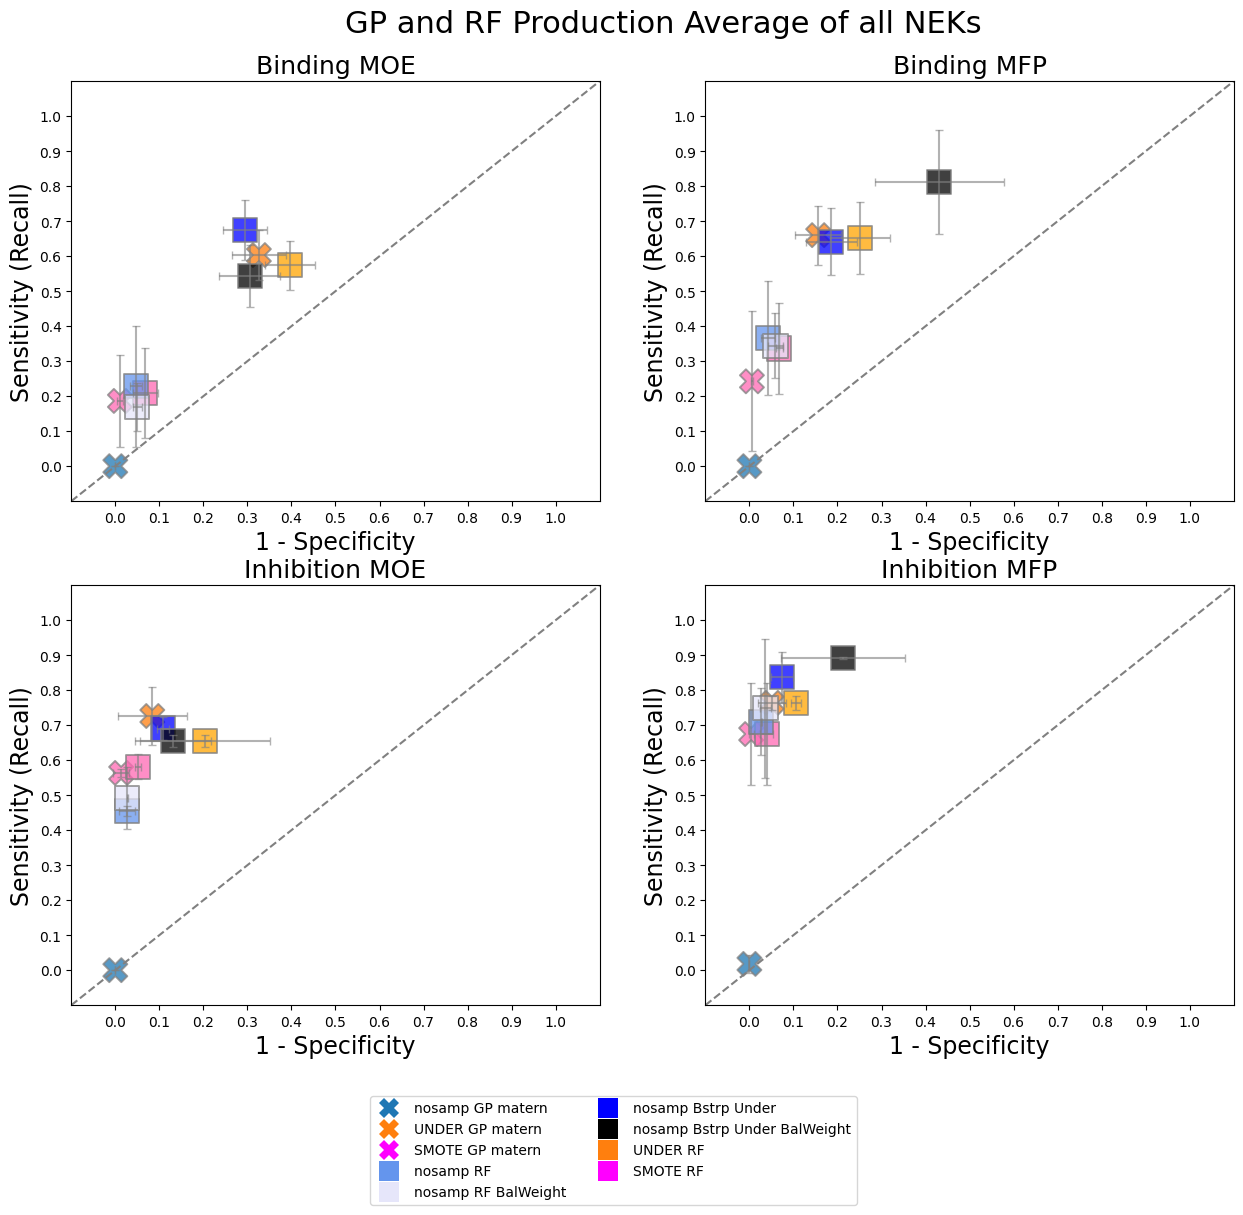

In [104]:

fig, axs = plt.subplots(2,2, figsize=(15,12))
for i, this_df in enumerate(list([all_bind, all_inhib])): 
    moe_df =this_df[this_df['feat_type'] == 'MOE']
    mfp_df = this_df[this_df['feat_type'] == 'MFP']
    moe_avg=moe_df.groupby(['feat_type', 'strategy', 'modeling_type'])[['recall', '1-specificity']].mean()
    mfp_avg=mfp_df.groupby(['feat_type', 'strategy', 'modeling_type'])[['recall', '1-specificity']].mean()
    moe_std = moe_df.groupby(['feat_type', 'strategy', 'modeling_type' ])[['recall', '1-specificity']].std().reset_index()
    mfp_std = mfp_df.groupby(['feat_type', 'strategy', 'modeling_type'])[['recall', '1-specificity']].std().reset_index()
    
    plt.suptitle('GP and RF Production Average of all NEKs',fontsize=22, x=0.52, y=0.94)
    sns.scatterplot(data=moe_avg, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,edgecolor='gray', ax=axs[i,0])
    axs[i, 0].errorbar(x=moe_avg['1-specificity'], y=moe_avg['recall'],
                       xerr=moe_std['1-specificity'], yerr=moe_std['recall'],
                       fmt='none', ecolor='gray', alpha=0.6, capsize=3)
    sns.scatterplot(data=mfp_avg, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,legend=True, ax=axs[i,1],edgecolor='gray')
    axs[i,1].errorbar(x=mfp_avg['1-specificity'], y=mfp_avg['recall'],
                       xerr=mfp_std['1-specificity'], yerr=mfp_std['recall'],
                       fmt='none', ecolor='gray', alpha=0.6, capsize=3)
    for j in range(2):  
        axs[i, j].plot([-0.1, 1.1], [-0.1, 1.1], linestyle='--', color='gray')
        axs[i, j].set_xlabel('1 - Specificity', fontsize=17)
        axs[i, j].set_ylabel('Sensitivity (Recall)', fontsize=17)
        axs[i, j].set_xlim(-0.1, 1.1)
        axs[i, j].set_ylim(-0.1, 1.1)
        axs[i, j].set_xticks(np.arange(0, 1.1, 0.1))
        axs[i, j].set_yticks(np.arange(0, 1.1, 0.1))
        axs[i, j].legend_.remove()
    
    axs[i, 0].set_title(f'{moe_df["nek type"].iloc[0]} MOE', fontsize=18)
    axs[i, 1].set_title(f'{mfp_df["nek type"].iloc[0]} MFP', fontsize=18)
   
    raw_RF_BCW = Line2D([0], [0], color='lavender', marker='s', markersize=15, linestyle='None', markerfacecolor='lavender', markeredgewidth=0, label='nosamp RF BalWeight')
    raw_BRFC = Line2D([0], [0], color='blue', marker='s', markersize=15, linestyle='None', markerfacecolor='blue', markeredgewidth=0, label='nosamp Bstrp Under')
    raw_BRFC_BCW = Line2D([0], [0], color='black', marker='s', markersize=15, linestyle='None', markerfacecolor='black', markeredgewidth=0, label='nosamp Bstrp Under BalWeight')
    UNDER_RF = Line2D([0], [0], color='tab:orange', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER RF')
    ADASYN_RF = Line2D([0], [0], color='tab:red', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN RF')
    raw_RF =  Line2D([0], [0], color='cornflowerblue', marker='s', markersize=15, linestyle='None', markerfacecolor='cornflowerblue', markeredgewidth=0, label='nosamp RF')
    UNDER_GP_matern = Line2D([0],[0], color='tab:orange', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP matern')
    UNDER_GP_RBF = Line2D([0],[0], color='tab:orange', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP RBF')
    ADASYN_GP_matern = Line2D([0], [0], color='tab:red', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP matern')
    ADASYN_GP_RBF = Line2D([0], [0], color='tab:red', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP RBF')
    SMOTE_RF = Line2D([0], [0], color='magenta', marker='s', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE RF')
    SMOTE_GP_matern = Line2D([0], [0], color='magenta', marker='X', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE GP matern')
    SMOTE_GP_RBF = Line2D([0], [0], color='magenta', marker='o', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE GP RBF')
    no_samp_GP_matern = Line2D([0], [0], color='tab:blue', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='nosamp GP matern')
    no_samp_GP_RBF = Line2D([0], [0], color='tab:blue', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='nosamp GP RBF')
   
    axs[1,1].legend(handles=[no_samp_GP_matern,UNDER_GP_matern, SMOTE_GP_matern,
                             raw_RF,raw_RF_BCW,raw_BRFC, raw_BRFC_BCW, UNDER_RF,SMOTE_RF], ncols=2, bbox_to_anchor=(.3, -.2) )

    plt.savefig(f'RF_GP_prod_avg.png',bbox_inches='tight')

In [145]:
plotting_test = full_df.copy() 
# plotting_test=plotting_test[plotting_test['strategy']=='no_sampling']
# for nek in plotting_test['NEK'].unique():
#     fig, axs = plt.subplots(1,2, figsize=(12,6))
#     nek_df = plotting_test[plotting_test['NEK']==nek] 
#     moe_df = nek_df[nek_df['feat_type']=='MOE'] 
#     mfp_df =nek_df[nek_df['feat_type']=='MFP'] 
#     sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
#                    alpha=0.75,s=300, palette=samp_palette,edgecolor='gray', ax=axs[0])
#     sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
#                    alpha=0.75,s=300, palette=samp_palette,legend=True, ax=axs[1],edgecolor='gray')
    
#     plt.suptitle(f'{nek} Results Sensitivity vs. 1-Specificity', fontsize=18, x=0.46, y =.96)
#     for i, ax in enumerate(axs): 
#         axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
#         axs[i].set_xlim(-0.1, 1.1)
#         axs[i].set_ylim(-0.1, 1.1)
#         axs[i].set_xlabel('1 - Specificity', fontsize=16)
#         axs[i].set_ylabel('Sensitivity (Recall)', fontsize=16)
#         axs[i].get_legend().remove()
        
#     axs[0].set_title(f'MOE', fontsize=16)
#     axs[1].set_title(f'MFP', fontsize=16)
#     axs[1].legend(ncols=1, bbox_to_anchor=(1.45, 0.78))
#     plt.tight_layout()

In [135]:
plotting_test

,model,NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,ROC_AUC,MCC,balanced_accuracy,modeling_type,set,1-specificity,nek type,model version,RF_type
1,NEK2_binding_MOE_none_scaled_matern,NEK2_binding,no_sampling,MOE,"[271, 0, 12, 0]",0.000000,1.000000,0.957597,0.000000,0.000000,0.500000,0.000000,0.500000,GP_matern,prod,0.000000,Binding,GP_matern,NaN
3,NEK2_binding_MOE_UNDER_matern,NEK2_binding,UNDER,MOE,"[195, 76, 6, 6]",0.500000,0.719557,0.710247,0.073171,0.127660,0.609779,0.097525,0.609779,GP_matern,prod,0.280443,Binding,GP_matern,NaN
5,NEK2_binding_MOE_SMOTE_matern,NEK2_binding,SMOTE,MOE,"[269, 2, 11, 1]",0.083333,0.992620,0.954064,0.333333,0.133333,0.537977,0.149445,0.537977,GP_matern,prod,0.007380,Binding,GP_matern,NaN
9,NEK2_binding_MFP_none_scaled_matern,NEK2_binding,no_sampling,MFP,"[271, 0, 12, 0]",0.000000,1.000000,0.957597,0.000000,0.000000,0.500000,0.000000,0.500000,GP_matern,prod,0.000000,Binding,GP_matern,NaN
11,NEK2_binding_MFP_UNDER_matern,NEK2_binding,UNDER,MFP,"[234, 37, 5, 7]",0.583333,0.863469,0.851590,0.159091,0.250000,0.723401,0.248465,0.723401,GP_matern,prod,0.136531,Binding,GP_matern,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NEK9_binding_MFP_SMOTE_RF,NEK9_binding,SMOTE_RF,MFP,"[253, 17, 9, 4]",0.307692,0.937037,0.908127,0.190476,0.235294,0.622365,0.195470,0.622365,RF,prod,0.062963,Binding,RF,RF
164,NEK9_inhibition_MOE_UNDER_RF,NEK9_inhibition,UNDER_RF,MOE,"[64, 7, 3, 6]",0.666667,0.901408,0.875000,0.461538,0.545455,0.784038,0.486572,0.784038,RF,prod,0.098592,Inhibition,RF,RF
168,NEK9_inhibition_MOE_SMOTE_RF,NEK9_inhibition,SMOTE_RF,MOE,"[67, 4, 4, 5]",0.555556,0.943662,0.900000,0.555556,0.555556,0.749609,0.499218,0.749609,RF,prod,0.056338,Inhibition,RF,RF
180,NEK9_inhibition_MFP_UNDER_RF,NEK9_inhibition,UNDER_RF,MFP,"[64, 7, 2, 7]",0.777778,0.901408,0.887500,0.500000,0.608696,0.839593,0.564811,0.839593,RF,prod,0.098592,Inhibition,RF,RF


In [136]:
plotting_test['modeling_type'].unique()
just_rf 

array(['GP_matern', 'RF'], dtype=object)

In [169]:
ratio_df

,NEK,feat_type,strategy,total_samples,total actives,total_actives%,train_active%,test_active%
0,NEK2_binding,MOE,no_sampling,1408,57,4.048295,4.000000,4.240283
1,NEK2_binding,MOE,UNDER,373,57,15.281501,50.000000,4.240283
2,NEK2_binding,MOE,SMOTE,2443,1092,44.699140,50.000000,4.240283
3,NEK2_binding,MOE,ADASYN,2445,1094,44.744376,50.046253,4.240283
4,NEK2_binding,MFP,no_sampling,1408,57,4.048295,4.000000,4.240283
5,NEK2_binding,MFP,UNDER,373,57,15.281501,50.000000,4.240283
6,NEK2_binding,MFP,SMOTE,2443,1092,44.699140,50.000000,4.240283
7,NEK2_binding,MFP,ADASYN,2438,1087,44.585726,49.883991,4.240283
8,NEK2_inhibition,MOE,no_sampling,2032,140,6.889764,6.892308,6.879607
9,NEK2_inhibition,MOE,UNDER,631,140,22.187005,50.000000,6.879607


In [204]:
pal3={'MOE_UNDER':'papayawhip', 'MOE_SMOTE':'pink', 'MFP_UNDER':'darkorange' , 'MFP_SMOTE': 'hotpink'}

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_32240/3629421293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['strategy']=filtered['strategy'].replace('SMOTE_RF', 'SMOTE')
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_32240/3629421293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['strategy']=filtered['strategy'].replace('UNDER_RF', 'UNDER')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

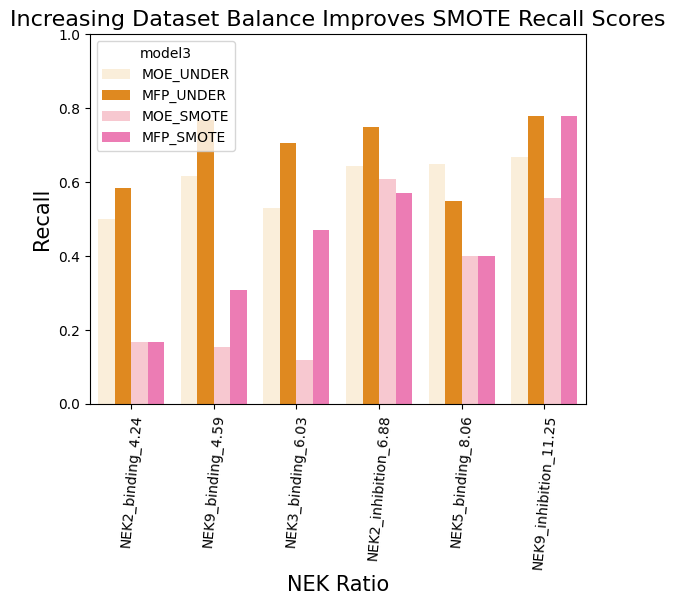

In [218]:
ratio_df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/dataset_creation/NEK_ratios.csv')
ratio_df=ratio_df.replace('none_scaled', 'no_sampling')
ratio_df=ratio_df.round(2)
just_rf = plotting_test[plotting_test['RF_type'] == 'RF']
filtered = just_rf[(just_rf['strategy'] == 'SMOTE_RF') | (just_rf['strategy']=='UNDER_RF')]
# filtered = just_rf[just_rf['strategy'] == 'SMOTE_RF']
filtered['strategy']=filtered['strategy'].replace('SMOTE_RF', 'SMOTE')
filtered['strategy']=filtered['strategy'].replace('UNDER_RF', 'UNDER')
plotting_df = filtered.merge(ratio_df, on=['NEK', 'strategy'])

plotting_df=plotting_df.sort_values('test_active%')
plotting_df['NEK_ratio'] = plotting_df['NEK'].astype(str)+'_'+plotting_df['test_active%'].astype(str)
plotting_df['model2'] = plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']+'_'+plotting_df['NEK_ratio']
plotting_df['model3'] =plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']
metric_cols = ['recall', '1-specificity','NEK', 'test_active%']

dflong = pd.melt(plotting_df, id_vars=['strategy','NEK', 'feat_type_x', 'test_active%', 'model3', 'model2', 
                        'NEK_ratio'], value_vars=['recall'], 
                 var_name='Metric', value_name='Metric_value')
fig, ax = plt.subplots() 
sns.barplot(data=dflong,x='NEK_ratio', y='Metric_value' ,hue='model3', palette=pal3)
plt.ylabel('Recall',fontsize=15)
plt.xlabel('NEK Ratio', fontsize=15)
plt.xticks(rotation = 85)
plt.ylim(0,1)
plt.title('Increasing Dataset Balance Improves SMOTE Recall Scores',fontsize=16)
plt.savefig('Increasing_Dataset_Balance_Improves_SMOTE_Recall_Scores.png',bbox_inches='tight')
plt.show();
